###  Import Statements


In [174]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements

### Notebook Presentation

In [175]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [176]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎


In [177]:
print(data.shape)


(506, 14)


In [178]:
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

In [179]:
print(data.head())

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  PRICE  
0   4.98  24.00  
1   9.14  21.60  
2   4.03  34.70  
3   2.94  33.40  
4   5.33  36.20  


In [180]:
print(data.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [181]:
print(data.duplicated().sum())

0


## Descriptive Statistics

In [182]:
print(data["PTRATIO"].mean())

18.455533596837945


In [183]:
print(data["PRICE"].mean())

22.532806324110677


In [184]:
print("CHAS indicates if the residence is next to the Charles River. It is a binary variable, so it is a categorical variable. It's 1 if the residence is next to the river, and 0 if it's not.")
print(f"Max value: {data['CHAS'].max()}")   
print(f"Min value: {data['CHAS'].min()}")

CHAS indicates if the residence is next to the Charles River. It is a binary variable, so it is a categorical variable. It's 1 if the residence is next to the river, and 0 if it's not.
Max value: 1.0
Min value: 0.0


In [185]:
print(f"Maximum number of rooms per dwelling: {data['RM'].max()}")
print(f"Minimum number of rooms per dwelling: {data['RM'].min()}")

Maximum number of rooms per dwelling: 8.78
Minimum number of rooms per dwelling: 3.561


## Visualise the Features


#### House Prices 💰

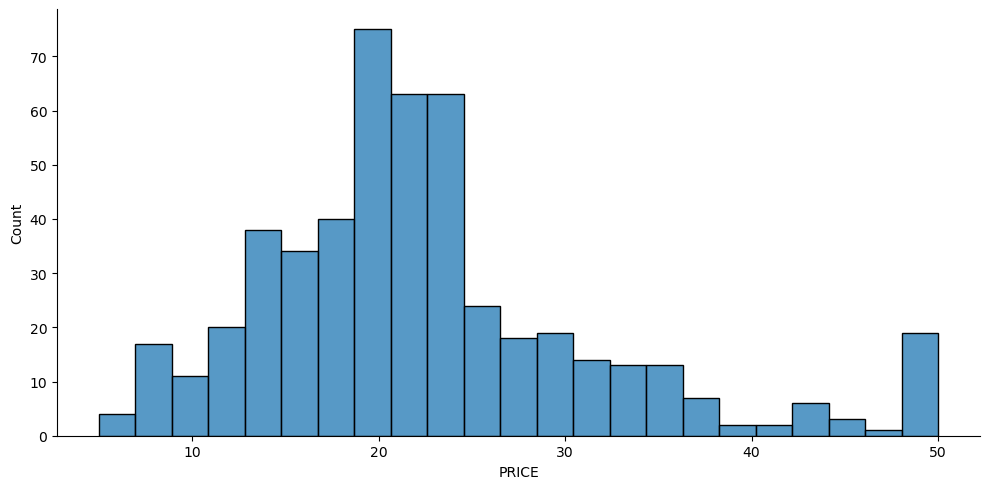

In [186]:
sns.displot(data=data, x="PRICE",aspect=2)

#### Distance to Employment - Length of Commute 🚗

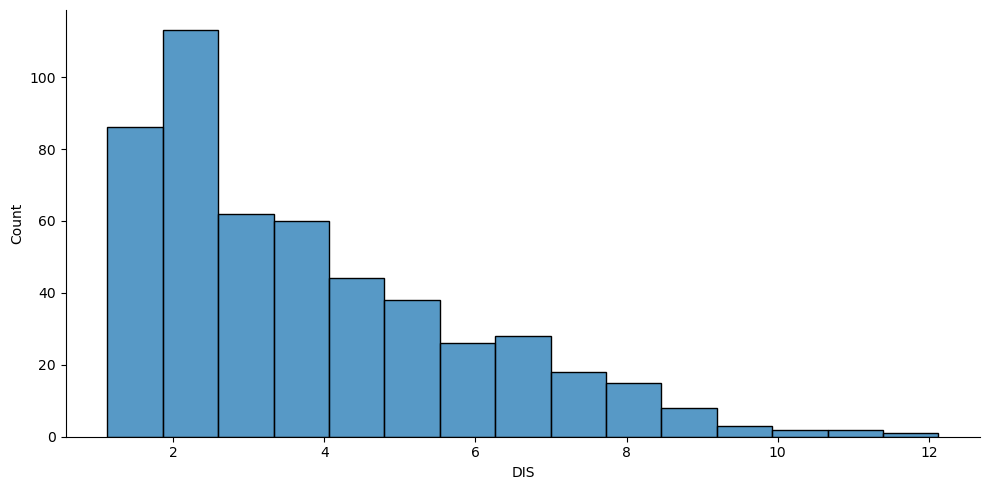

In [187]:
sns.displot(data=data, x="DIS",aspect=2)

#### Number of Rooms

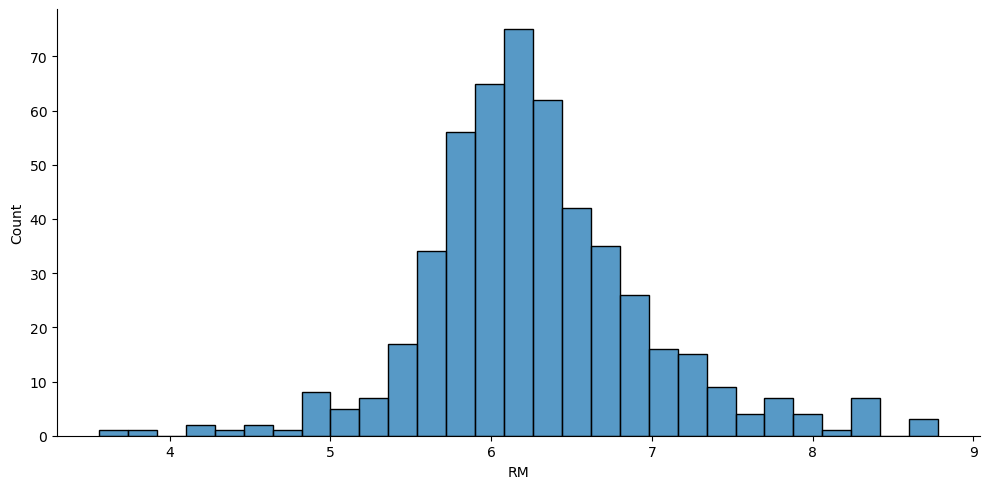

In [188]:
sns.displot(data=data, x="RM",aspect=2)

#### Access to Highways 🛣

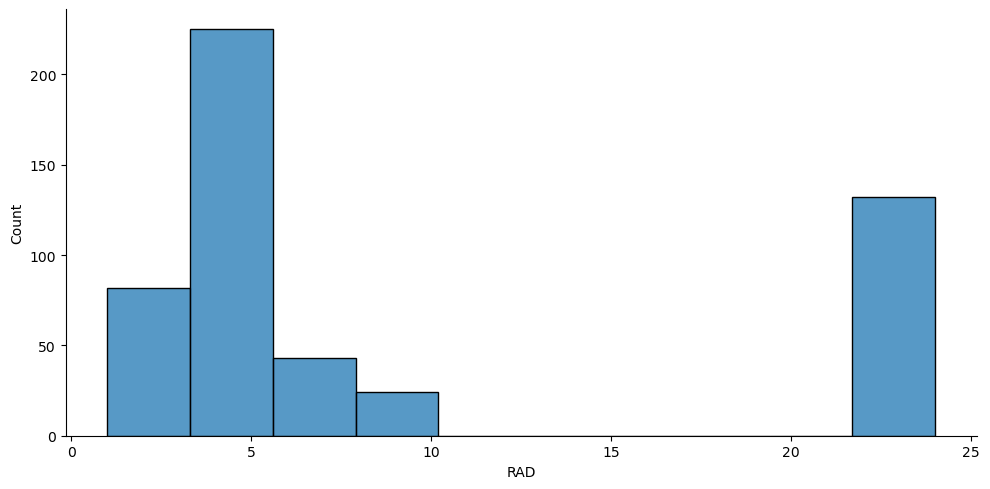

In [189]:
sns.displot(data=data, x="RAD",aspect=2)

#### Next to the River? ⛵️

**Challenge**

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. The bar chart should look something like this:

<img src=https://i.imgur.com/AHwoQ6l.png height=350>

You can make your life easier by providing a list of values for the x-axis (e.g., `x=['No', 'Yes']`)

In [190]:

chas_counts = data['CHAS'].value_counts()
fig = px.bar(x=['No', 'Yes'], y=chas_counts, labels={'x': 'Next to River', 'y': 'Number of Homes'}, title='Next to Charles River?', color=['No', 'Yes'])
fig.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

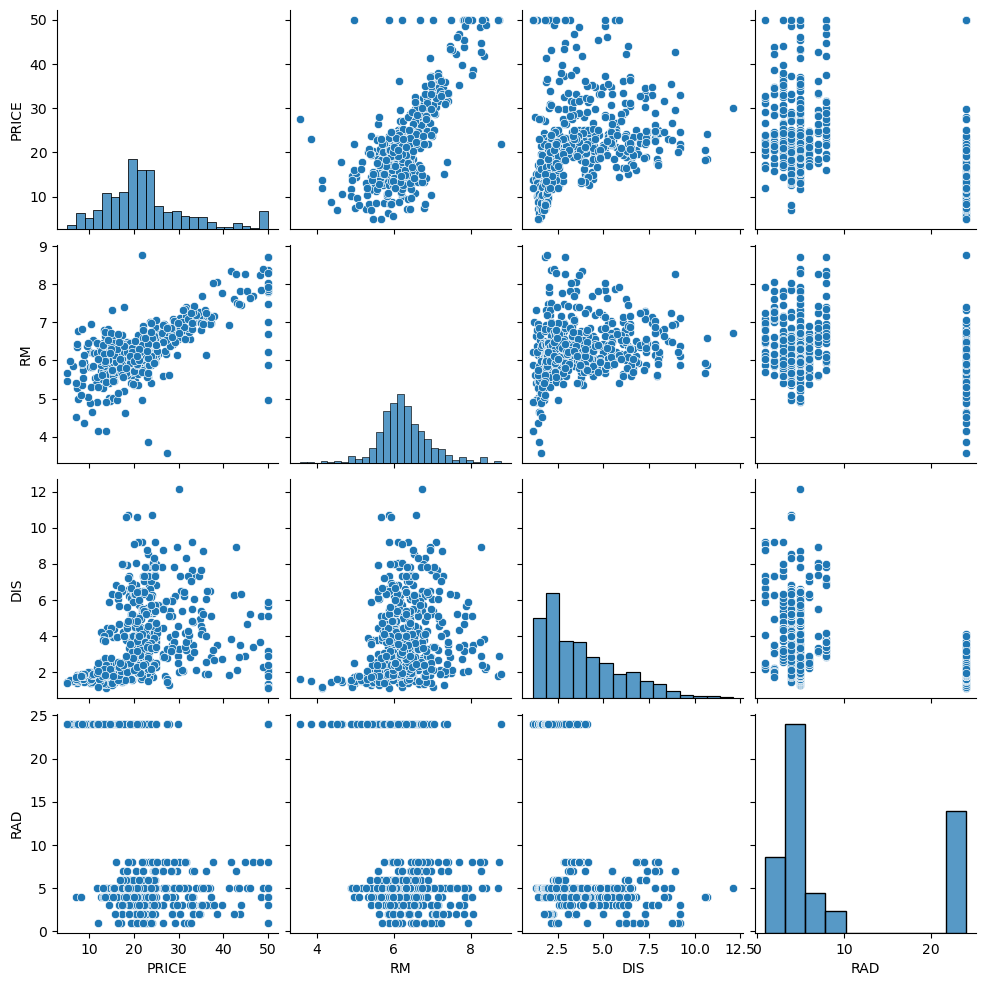

In [191]:
sns.pairplot(data, vars=['PRICE', 'RM', 'DIS', 'RAD'])

**Challenge**

#### Distance from Employment vs. Pollution

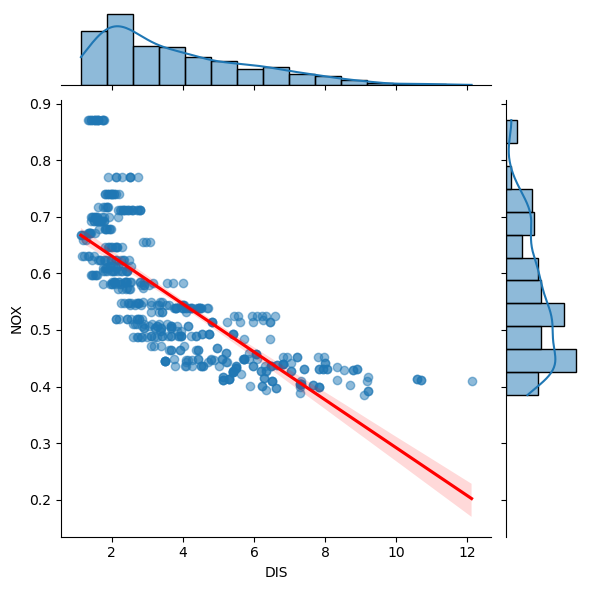

In [192]:
sns.jointplot(data=data, x='DIS', y='NOX', kind='reg',joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

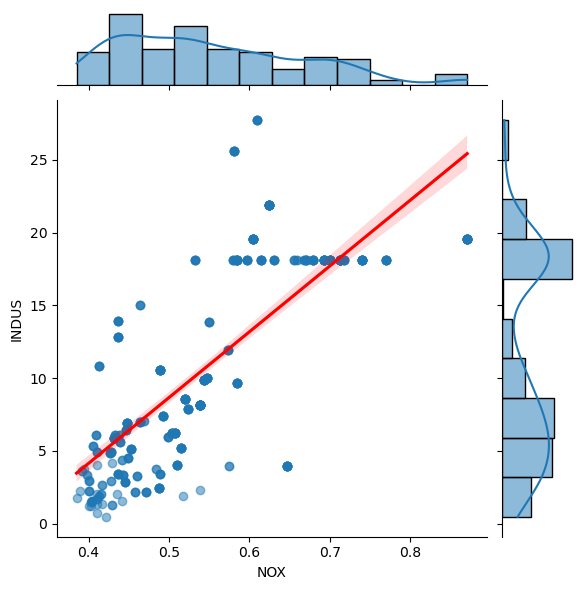

In [193]:
sns.jointplot(data=data, x='NOX', y='INDUS', kind='reg',joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

#### % of Lower Income Population vs Average Number of Rooms

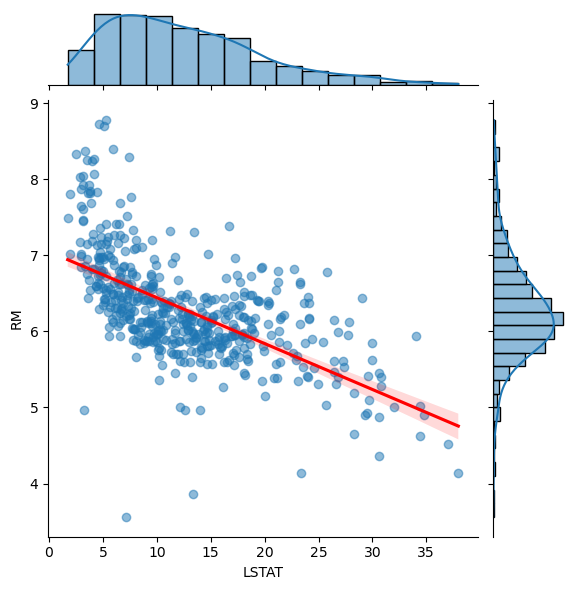

In [194]:
sns.jointplot(data=data, x='LSTAT', y='RM', kind='reg',joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

#### % of Lower Income Population versus Home Price

**Challenge**

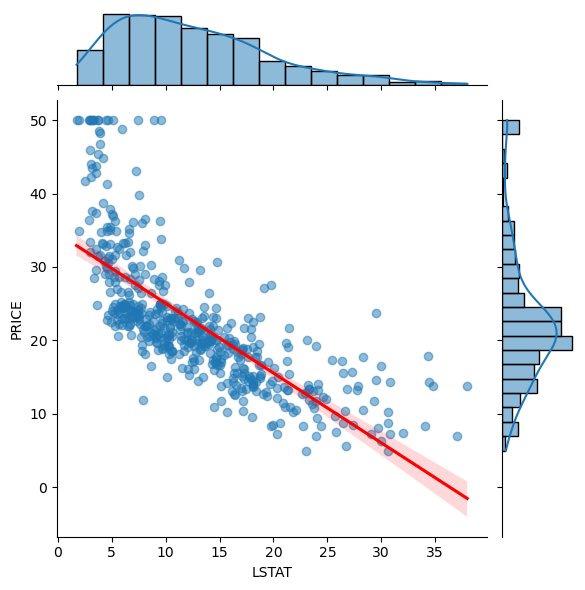

In [195]:
sns.jointplot(data=data, x='LSTAT', y='PRICE', kind='reg',joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

#### Number of Rooms versus Home Value

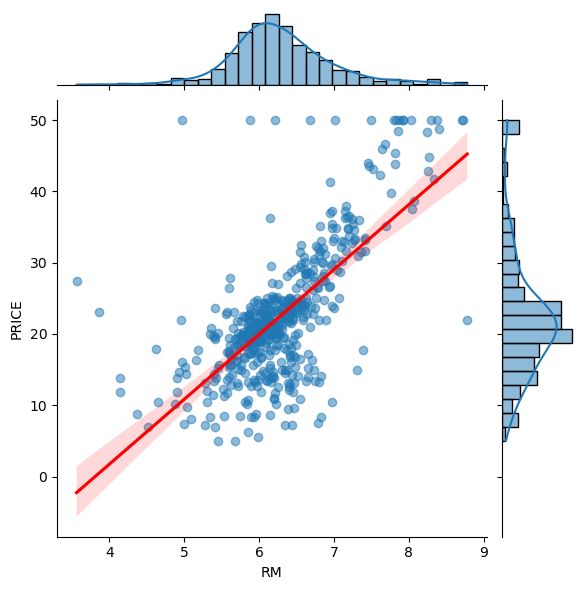

In [196]:
sns.jointplot(data=data, x='RM', y='PRICE', kind='reg',joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

# Split Training & Test Dataset


In [197]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='PRICE')

y = data['PRICE']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

# Multivariable Regression

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

In [199]:
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_train, y_train)
print(f'R-squared: {r2:.2f}')


R-squared: 0.75


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

In [200]:
coefficients = model.coef_ 
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

CRIM: -0.12818065642264972
ZN: 0.06319817864609002
INDUS: -0.007576276015341318
CHAS: 1.9745145165621991
NOX: -16.27198895146977
RM: 3.1084562454033025
AGE: 0.016292215345610976
DIS: -1.483013596605022
RAD: 0.30398820612116534
TAX: -0.012082071043592893
PTRATIO: -0.8203056992885654
B: 0.01141898902221344
LSTAT: -0.5816264311821351


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

The first plot should be actual values (`y_train`) against the predicted value values: 

<img src=https://i.imgur.com/YMttBNV.png height=350>

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line our residuals.


The second plot should be the residuals against the predicted prices. Here's what we're looking for: 

<img src=https://i.imgur.com/HphsBsj.png height=350>



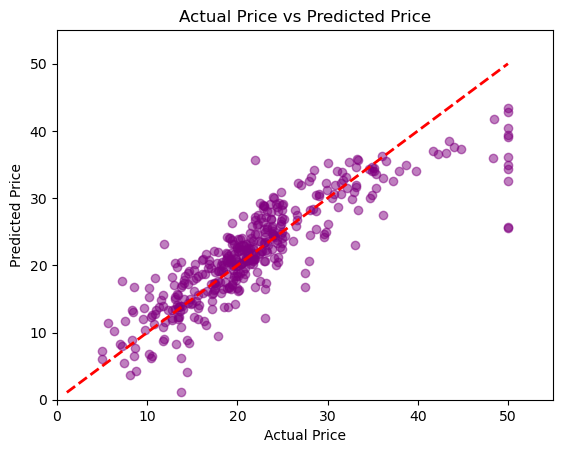

In [201]:
predicted_values = model.predict(X_train)
plt.scatter(y_train,predicted_values, alpha=0.5,color='purple')
max_value = max(max(y_train), max(predicted_values))  # Get the max value to set the limits for the line
min_value = min(min(y_train), min(predicted_values))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0,55)
plt.ylim(0,55)
plt.title('Actual Price vs Predicted Price')    
plt.show()

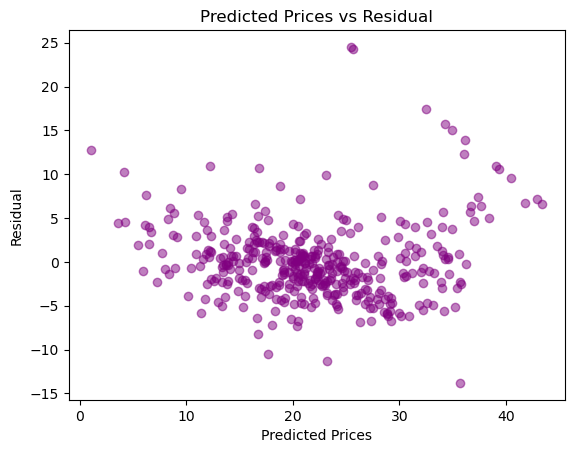

In [202]:
residual=(y_train-predicted_values)
plt.scatter(predicted_values,residual, alpha=0.5,color='purple')
plt.xlabel('Predicted Prices')
plt.ylabel('Residual')
plt.title('Predicted Prices vs Residual')
plt.show()


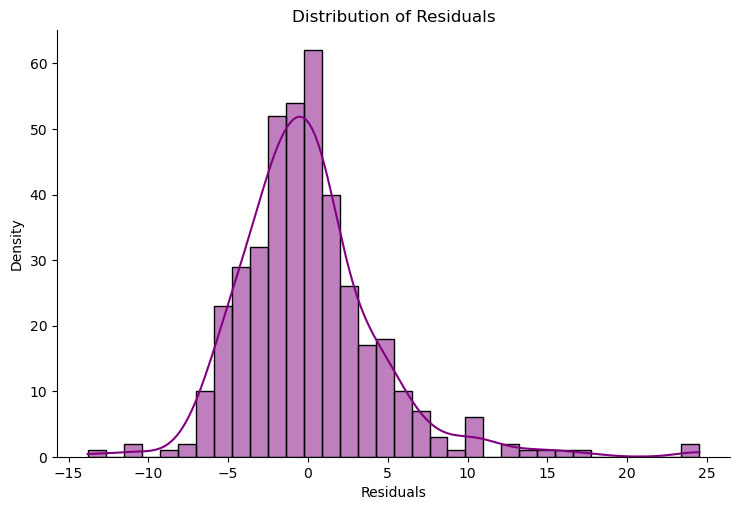

In [203]:
from scipy.stats import skew
mean_residual = np.mean(residual)
skew_residual = skew(residual)

sns.displot(residual, kde=True, color='purple', aspect=1.5)

# 3. Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')

# Show the plot
plt.show()

In [204]:
print(f'Mean of residuals: {mean_residual:.2f}')
print(f'Skewness of residuals: {skew_residual:.2f}')

Mean of residuals: 0.00
Skewness of residuals: 1.45


### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 


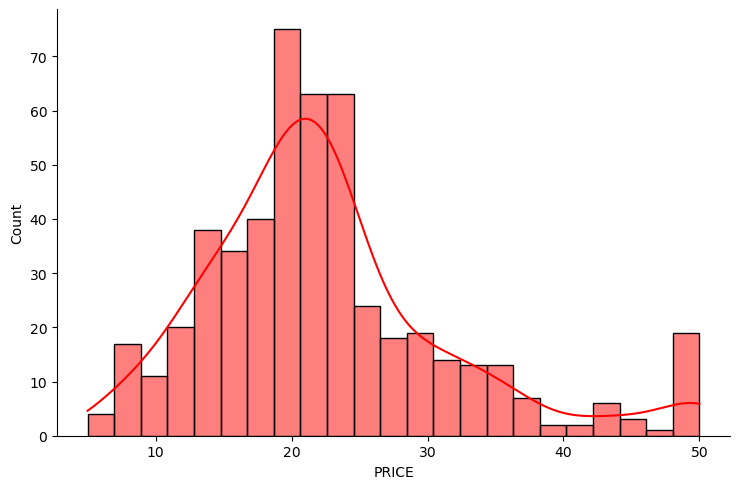

In [205]:
sns.displot(data["PRICE"], kde=True, color='red', aspect=1.5)


In [206]:
log_price = np.log(data["PRICE"])

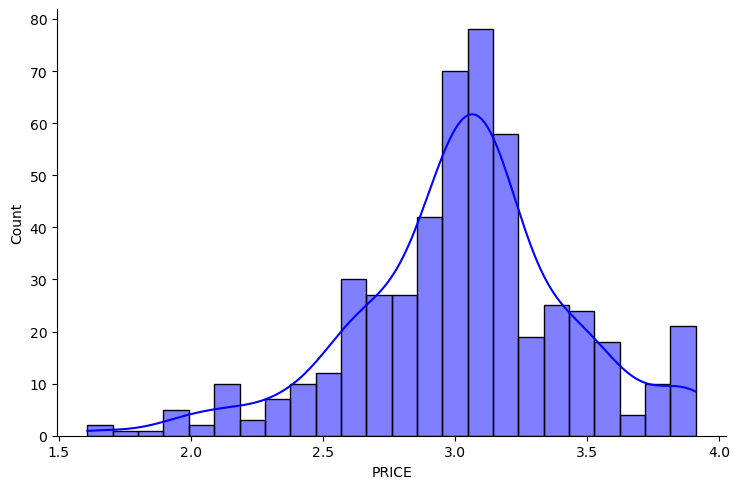

In [207]:
sns.displot(log_price, kde=True, color='blue', aspect=1.5)

In [208]:
skew_price=skew(data["PRICE"])
skew_logprice=skew(log_price)
print(f'Skewness of original price: {skew_price:.2f}')
print(f'Skewness of log-transformed price: {skew_logprice:.2f}')


Skewness of original price: 1.10
Skewness of log-transformed price: -0.33


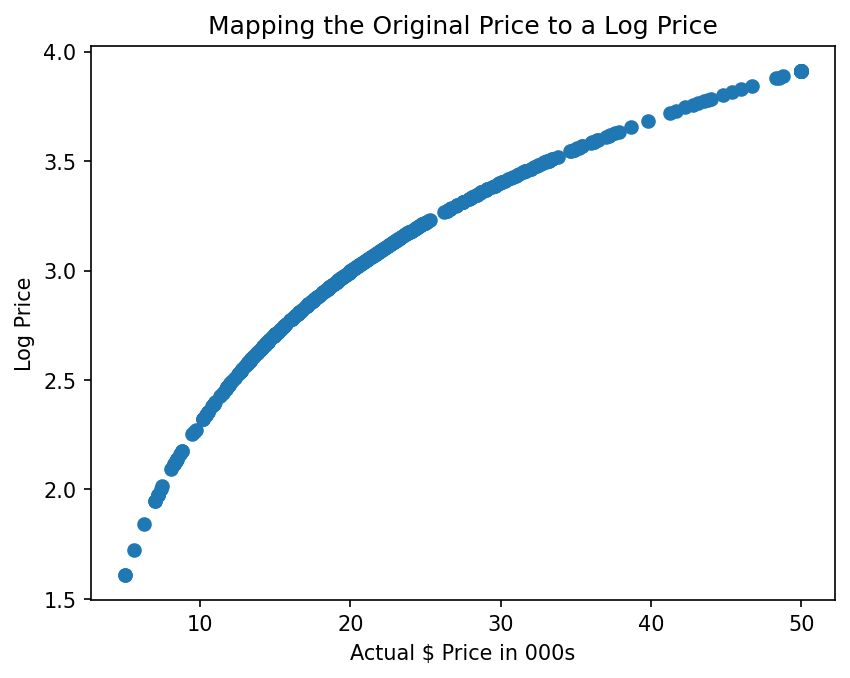

In [209]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$



In [210]:
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


## Evaluating Coefficients with Log Prices

In [211]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


In [212]:
print("Being next to the river has a positive effect on the price of the house.")
print("As there are more students per teacher, the price of the house decreases.")
print("The quality of the public schools in the area has a positive effect on the price of the house.")

Being next to the river has a positive effect on the price of the house.
As there are more students per teacher, the price of the house decreases.
The quality of the public schools in the area has a positive effect on the price of the house.


## Regression with Log Prices & Residual Plots

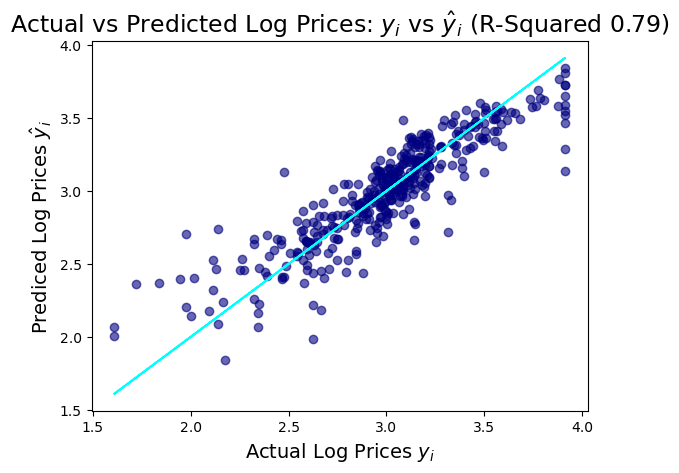

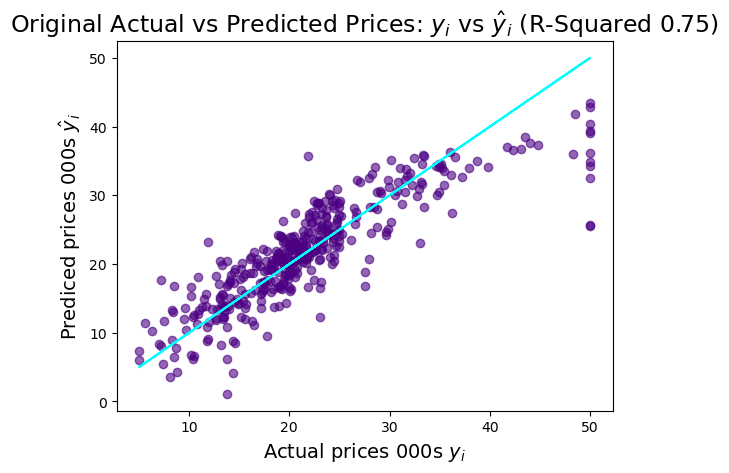

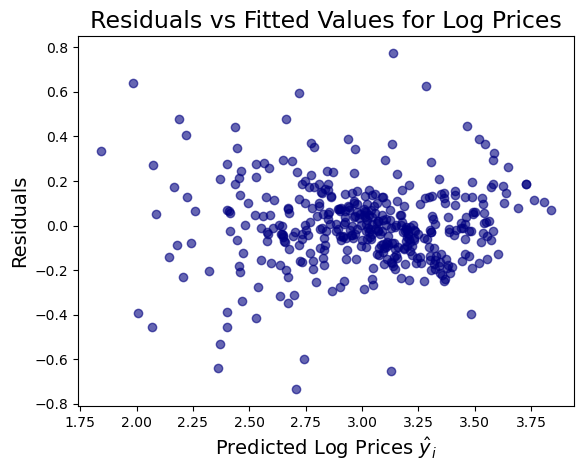

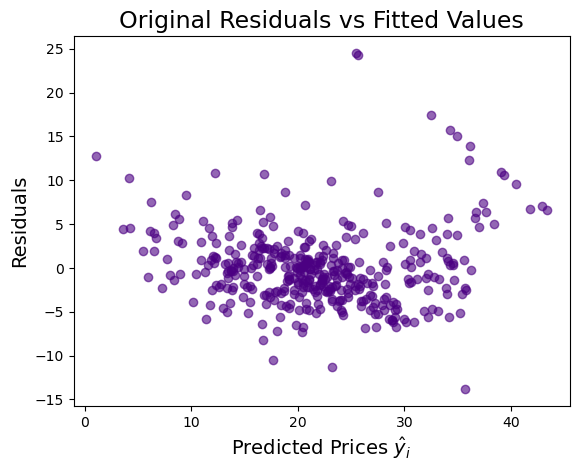

In [213]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {r2:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_values, y=residual, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [214]:
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

print(f'Mean of residuals: {log_resid_mean}')
print(f'Skewness of residuals: {log_resid_skew}')


Mean of residuals: 0.0
Skewness of residuals: 0.09


# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

In [215]:
print(f'Original Model Test Data r-squared: {model.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')



Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [216]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [217]:
# Predict the log price using the average property stats
log_price_prediction = log_regr.predict(property_stats)

# Convert the log price back to the actual price
price_prediction = np.exp(log_price_prediction)

print(f'Predicted log price: {log_price_prediction[0]:.2f}')
print(f'Predicted price: ${price_prediction[0]*1000:.2f}')

Predicted log price: 3.03
Predicted price: $20703.18


In [219]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [220]:
# Solution:
    # Solution:
property_1 = property_stats.copy()
property_1['CHAS'] = 1 if next_to_river else 0
property_1['RM'] = nr_rooms
property_1['PTRATIO'] = students_per_classroom
property_1['DIS'] = distance_to_town
property_1['NOX'] = pollution
property_1['LSTAT'] = amount_of_poverty
# Predict the log price using the defined property characteristics
log_price_prediction_1 = log_regr.predict(property_1)
# Convert the log price back to the actual price
price_prediction_1 = np.exp(log_price_prediction_1)
print(f'Predicted log price: {log_price_prediction_1[0]:.2f}')
print(f'Predicted price: ${price_prediction_1[0]*1000:.2f}')

Predicted log price: 3.25
Predicted price: $25792.03
